<a href="https://colab.research.google.com/github/viniscera/Topicos_Especiais_Em_Engenharia_Economica/blob/main/Estatistica_dos_retornos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística dos retornos

## Instalando e importando as bibliotecas necessárias

In [ ]:
!pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 23.7 MB/s 
     |████████████████████████████████| 235 kB 53.8 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=2082ae7d9e7adf476e9dae8011a3ac548b34eb10ec663e785b167ba01e7384bf
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy


In [ ]:
!pip install -U pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import investpy
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importando dados

In [ ]:
itsa4 = investpy.get_stock_historical_data(stock="ITSA4", country='Brazil', from_date="01/01/2019", to_date="20/08/2022")

ConnectionError: ignored

In [ ]:
itsa4 = pdr.data.get_data_yahoo('ITSA4.SA', start='2019-01-01', end='2022-09-01')

In [ ]:
itsa4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,12.095238,11.504761,11.533333,12.047619,26420835.0,9.976938
2019-01-03,12.152380,11.914285,12.047619,12.152380,39787545.0,10.063691
2019-01-04,12.219047,11.961904,12.057142,12.114285,34350960.0,10.032148
2019-01-07,12.209523,12.019047,12.095238,12.104761,14108115.0,10.024261
2019-01-08,12.266666,11.952380,12.104761,12.266666,18163425.0,10.158336


In [ ]:
itsa4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 912 entries, 2019-01-02 to 2022-09-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       912 non-null    float64
 1   Low        912 non-null    float64
 2   Open       912 non-null    float64
 3   Close      912 non-null    float64
 4   Volume     912 non-null    float64
 5   Adj Close  912 non-null    float64
dtypes: float64(6)
memory usage: 49.9 KB


## Pré-processamento dos dados

In [ ]:
itsa4 = itsa4.rename({"Close": "ITAU"}, axis=1)
itsa4

,ITAU
Date,
2019-01-02,12.047619
2019-01-03,12.152380
2019-01-04,12.114285
2019-01-07,12.104761
2019-01-08,12.266666
...,...
2022-08-26,9.350000
2022-08-29,9.290000
2022-08-30,9.340000


In [ ]:
itsa4 = itsa4[['ITAU']]
itsa4

,ITAU
Date,
2019-01-02,12.047619
2019-01-03,12.152380
2019-01-04,12.114285
2019-01-07,12.104761
2019-01-08,12.266666
...,...
2022-08-26,9.350000
2022-08-29,9.290000
2022-08-30,9.340000


## Métodos de cálculo dos retornos

O Retorno pode ser interpretado como uma variação percentual dos preços

$R_t = \frac{P_t-P_{t-1}}{P_{t-1}} = P_t/P_{t-1}-1$ 

In [ ]:
itsa4.diff(1)/itsa4.shift(1)

,ITAU
Date,
2019-01-02,NaN
2019-01-03,0.008696
2019-01-04,-0.003135
2019-01-07,-0.000786
2019-01-08,0.013375
...,...
2022-08-26,-0.003198
2022-08-29,-0.006417
2022-08-30,0.005382


In [ ]:
itsa4/itsa4.shift(1) - 1

,ITAU
Date,
2019-01-02,NaN
2019-01-03,0.008696
2019-01-04,-0.003135
2019-01-07,-0.000786
2019-01-08,0.013375
...,...
2022-08-26,-0.003198
2022-08-29,-0.006417
2022-08-30,0.005382


Podemos utilizar uma função implementada no pandas para isso:

In [ ]:
itau_retornos = itsa4.pct_change()
itau_retornos

,ITAU
Date,
2019-01-02,NaN
2019-01-03,0.008696
2019-01-04,-0.003135
2019-01-07,-0.000786
2019-01-08,0.013375
...,...
2022-08-26,-0.003198
2022-08-29,-0.006417
2022-08-30,0.005382


Retorno logarítmo

In [ ]:
np.log(itsa4).diff(1)

,ITAU
Date,
2019-01-02,NaN
2019-01-03,0.008658
2019-01-04,-0.003140
2019-01-07,-0.000787
2019-01-08,0.013287
...,...
2022-08-26,-0.003203
2022-08-29,-0.006438
2022-08-30,0.005368


## Visualização dos dados

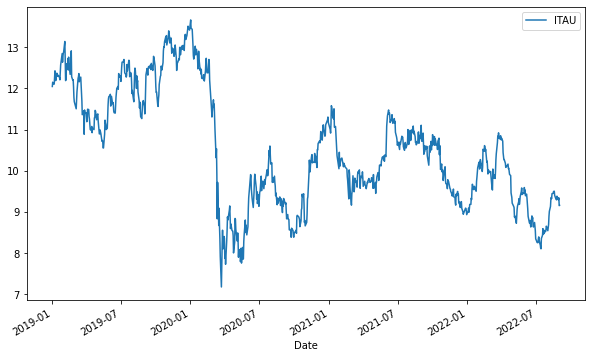

In [ ]:
itsa4.plot(figsize=(10,6));

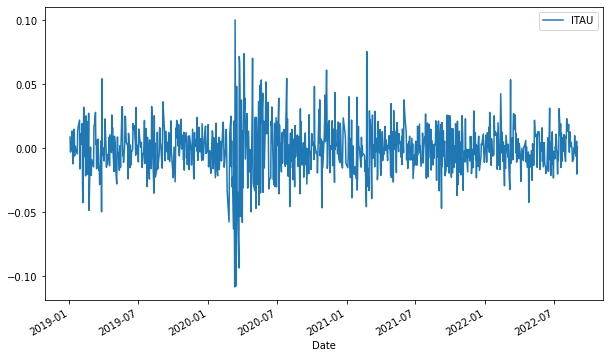

In [ ]:
itau_retornos.plot(figsize=(10,6));

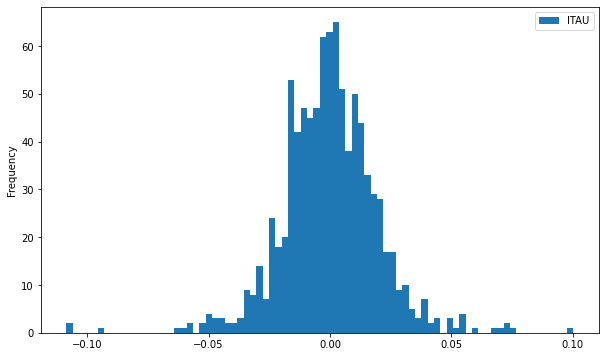

In [ ]:
itau_retornos.plot.hist(figsize=(10,6), bins=80);

## Estatística descritiva

Média

In [ ]:
itau_retornos.mean()

ITAU   -0.000107
dtype: float64

Desvio padrão amostral (Dividido por T-1)

In [ ]:
itau_retornos.std()

ITAU    0.01966
dtype: float64

Desvio padrão populacional (Dividido por T)

In [ ]:
itau_retornos.std(ddof=0)

ITAU    0.019649
dtype: float64

In [ ]:
np.std(itau_retornos)

ITAU    0.019649
dtype: float64

Comando geral

In [ ]:
itau_retornos.describe()

,ITAU
count,911.000000
mean,-0.000107
std,0.019660
min,-0.108654
25%,-0.011456
50%,0.000000
75%,0.011176
max,0.100324


## Assimetria e curtose

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
retornos = itau_retornos.dropna()
retornos

,ITAU
Date,
2019-01-03,0.008696
2019-01-04,-0.003135
2019-01-07,-0.000786
2019-01-08,0.013375
2019-01-09,0.013199
...,...
2022-08-26,-0.003198
2022-08-29,-0.006417
2022-08-30,0.005382


Assimetria (skewness)

In [ ]:
skew?

In [ ]:
skew(retornos)

array([-0.13109849])

Curtose (kurtosis)

In [ ]:
kurtosis?

In [ ]:
kurtosis(retornos)

array([3.83197167])

## Testes de normalidade

### Testes "visuais"

Histograma comparando com uma distribuição normal

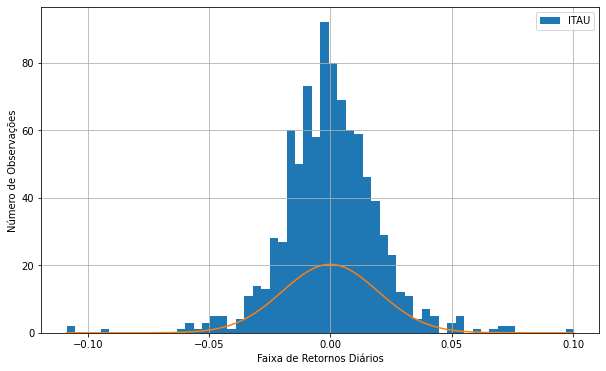

In [ ]:
from scipy import stats
retornos.plot.hist(figsize=(10,6), bins=60);
# parâmetros para curva normal
mediaR = retornos.mean()
desvpadR = retornos.std()
minR = retornos.min()
maxR = retornos.max()
x = np.linspace(minR,maxR,100)
plt.plot(x, stats.norm.pdf(x,mediaR,desvpadR))
plt.grid(True)
plt.xlabel('Faixa de Retornos Diários')
plt.ylabel('Número de Observações')
plt.show()

Distribuição cumulativa

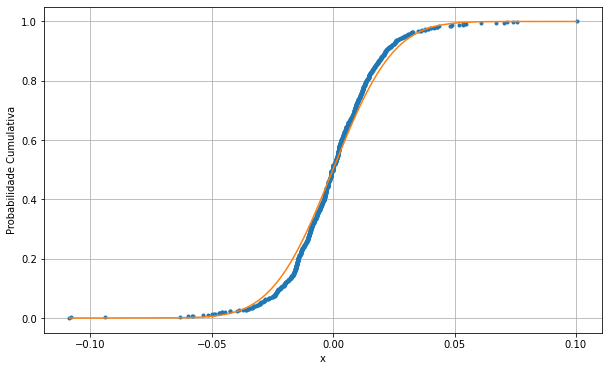

In [ ]:
plt.figure(figsize=(10,6))
x = retornos['ITAU'].sort_values().values
y = np.arange(1, len(x)+1)/float(len(x))
mediaR = np.mean(x)
desvpadR = np.std(x)
y1 = stats.norm.cdf((x-mediaR)/desvpadR)
plt.plot(x,y,marker='.', linestyle='none')
plt.plot(x,y1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Probabilidade Cumulativa')
plt.show()

Q-Q Plot (linha de Henry)

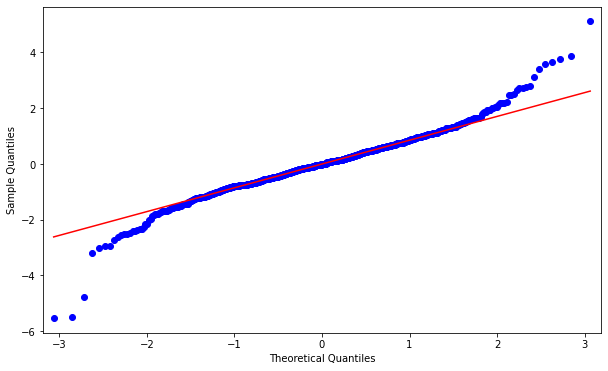

In [ ]:
from statsmodels.graphics.gofplots import qqplot
fig, ax = plt.subplots(figsize=(10, 6))
qqplot(retornos['ITAU'].values, line='q', dist = stats.norm, fit = True, ax=ax)
plt.show()

### Testes quantitativos

Teste de Shapiro-Wilk (1965)

Este teste tem como hipótese nula que a amostra possui uma distribuição normal. Caso o valor p < 0.05 a hipótese nula é rejeitada significando que os dados da amostra não são normalmente distribuídos

In [ ]:
from scipy.stats import shapiro

shapirowilk = shapiro(retornos)
shapirowilk

ShapiroResult(statistic=0.9596883654594421, pvalue=3.834161974865897e-15)

In [ ]:
if shapirowilk[1] <= 0.05:
  print("Hipotese Nula Rejeitada")
else:
  print("Não rejeitar hipotese nula") #minha amostra possui uma distribuição normal

Hipotese Nula Rejeitada


## Correlações

Mostrar que a correlação de duas variáveis aleatórias Y, X, relacionadas não linearmente fornece valor nulo

In [ ]:
X = np.random.randn(100)
Y = X**2

In [ ]:
X

array([ 0.30675088, -0.75343314, -1.24673427,  0.4363929 , -1.28570766,
        0.72551727, -0.51132553,  0.58751684,  1.17103607, -0.22153213,
       -1.12981483,  0.2990798 ,  0.51143072,  0.78346502, -0.1318276 ,
       -0.00674769, -0.59230638,  0.51744071,  0.23360496,  1.16673275,
       -2.58876444, -0.0102481 ,  0.8622352 , -0.63466454,  0.03815159,
       -0.8611412 , -0.64071771,  0.09039066, -0.03218843,  0.67551798,
        0.86207131,  0.87254595,  1.88505753, -1.24828806,  1.10434576,
       -0.95738701, -1.39405644, -0.91202143,  0.61024684, -0.98620642,
       -0.91707673, -0.49597465,  2.91398741, -1.92537754, -0.29281266,
        0.60964276,  0.68261429, -1.60905157,  0.98580672,  1.71381129,
       -1.27606693, -0.59291819, -0.19080368, -0.6622553 , -0.83863533,
        1.1919859 , -0.57060901, -0.31487963,  1.06761223,  1.26961769,
        0.69524767,  0.55496453, -0.60536274,  1.46585757, -2.12414745,
        0.06656391, -0.41516792, -0.29068894,  1.10973007,  1.03

In [ ]:
Y

array([9.40961011e-02, 5.67661501e-01, 1.55434634e+00, 1.90438767e-01,
       1.65304418e+00, 5.26375316e-01, 2.61453802e-01, 3.45176038e-01,
       1.37132547e+00, 4.90764832e-02, 1.27648156e+00, 8.94487260e-02,
       2.61561383e-01, 6.13817437e-01, 1.73785168e-02, 4.55312765e-05,
       3.50826853e-01, 2.67744893e-01, 5.45712791e-02, 1.36126532e+00,
       6.70170135e+00, 1.05023579e-04, 7.43449548e-01, 4.02799079e-01,
       1.45554391e-03, 7.41564165e-01, 4.10519190e-01, 8.17047084e-03,
       1.03609524e-03, 4.56324543e-01, 7.43166936e-01, 7.61336431e-01,
       3.55344188e+00, 1.55822307e+00, 1.21957955e+00, 9.16589885e-01,
       1.94339334e+00, 8.31783082e-01, 3.72401208e-01, 9.72603113e-01,
       8.41029733e-01, 2.45990849e-01, 8.49132262e+00, 3.70707866e+00,
       8.57392548e-02, 3.71664293e-01, 4.65962270e-01, 2.58904697e+00,
       9.71814894e-01, 2.93714913e+00, 1.62834682e+00, 3.51551981e-01,
       3.64060451e-02, 4.38582077e-01, 7.03309208e-01, 1.42083038e+00,
      

In [ ]:
np.corrcoef(Y,X)

array([[1.        , 0.04111289],
       [0.04111289, 1.        ]])

In [ ]:
pearsonr?

Agora se fosse uma relação linear do tipo Y = aX?

In [ ]:
Y_linear = 2*X

In [ ]:
np.corrcoef(Y_linear,X)

array([[1., 1.],
       [1., 1.]])